Trying KNeighborsClassifier - KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Got the result from ./1/predictions/KNeighborsClassifier.npy
{'classifier': 'Метод k ближайших соседей', 'Accuracy': 0.5912, 'AUC-ROC': 0.8831408, 'Precision': 0.6511376172346359, 'Recall': 0.5912000000000001, 'F1-score': 0.5486808031379853, 'TOP-2 Accuracy': 0.828, 'TOP-3 Accuracy': 0.9336}
Trying RandomForestClassifier - RandomForestClassifier(n_jobs=-1, random_state=42)
Got the result from ./1/predictions/RandomForestClassifier.npy
{'classifier': 'Случайный лес', 'Accuracy': 0.7504, 'AUC-ROC': 0.9327116000000002, 'Precision': 0.7551368207068693, 'Recall': 0.7504000000000001, 'F1-score': 0.74949276282608, 'TOP-2 Accuracy': 0.9032, 'TOP-3 Accuracy': 0.956}
Trying CatBoostClassifier - <catboost.core.CatBoostClassifier object at 0x00000132407F8AC0>
Got the result from ./1/predictions/CatBoostClassifier.npy
{'classifier': 'CatBoost', 'Accuracy': 0.808, 'AUC-ROC': 0.9560656000000002, 'Precision': 0.8094155622329

,classifier,Accuracy,AUC-ROC,Precision,Recall,F1-score,TOP-2 Accuracy,TOP-3 Accuracy
0,Метод k ближайших соседей,0.5912,0.883141,0.651138,0.5912,0.548681,0.8280,0.9336
1,Случайный лес,0.7504,0.932712,0.755137,0.7504,0.749493,0.9032,0.9560
2,CatBoost,0.8080,0.956066,0.809416,0.8080,0.807652,0.9288,0.9808
3,Нейронная сеть для тополог. признаков,0.7960,0.948767,0.798263,0.7960,0.795879,0.9272,0.9752
4,ResNet50 – базовая модель,0.7352,0.910684,0.749595,0.7352,0.738267,0.8600,0.9344
5,Комбинированная нейронная сеть,0.7528,0.927394,0.756479,0.7528,0.753868,0.8824,0.9416


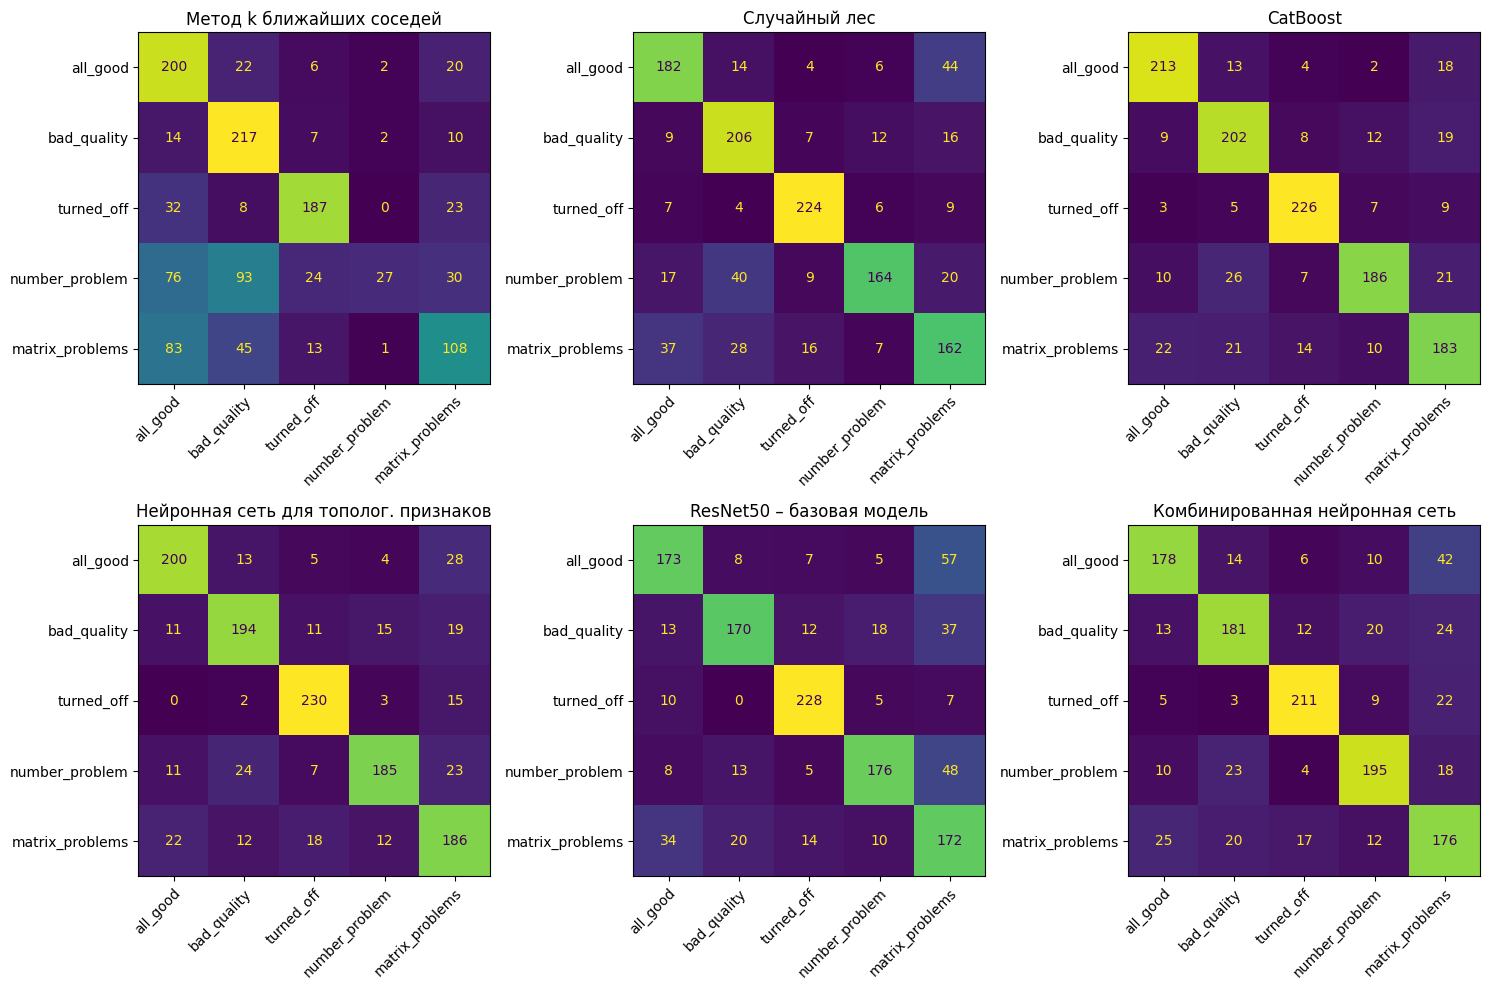

In [ ]:

import numpy
import cvtda.classification

CLASSES = [ 'all_good', 'bad_quality', 'turned_off', 'number_problem', 'matrix_problems' ]

test_labels = numpy.load("1/front/test_labels.npy")

cvtda.classification.classify(
    None, None, None, None,
    None, None, test_labels, None,
    dump_name = "1/predictions",
    catboost_device = 'CPU', xgboost_device = 'cpu',
    only_get_from_dump = True, label_names = CLASSES
)


In [37]:
front = numpy.load("1_imgs/front/test_images.npy")
left = numpy.load("1_imgs/lightbox_left/test_images.npy")
right = numpy.load("1_imgs/lightbox_right/test_images.npy")

[847 968 883 945 815 915]
[1194 1170 1162 1243 1176 1152]
[139 122 175  18 153 249]
[863 841 823 928 850 803]


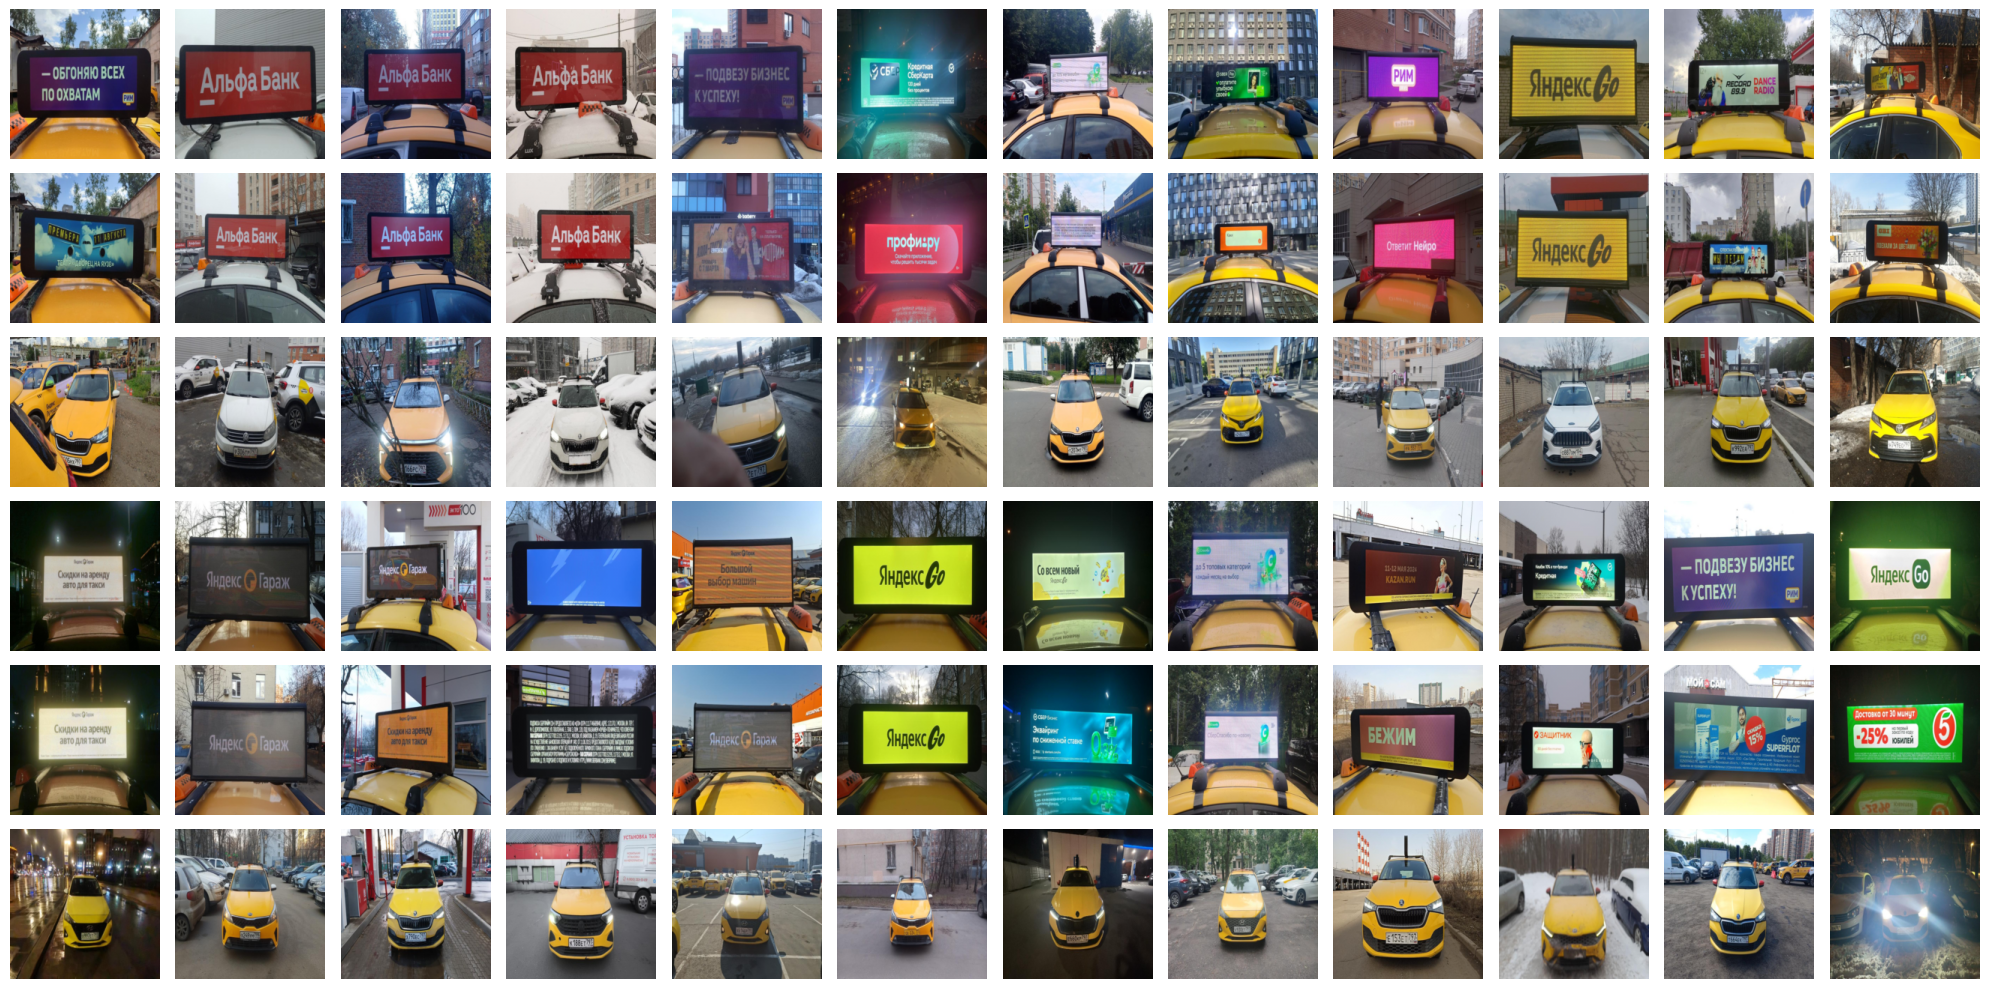

In [38]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(6, 12, figsize = (20, 10))

def draw(pred_class, target_class, i0, j0):
    numpy.random.seed(654)
    predictions = numpy.argmax(numpy.load("1/predictions/CatBoostClassifier.npy"), axis = 1)
    imgs1 = numpy.where(numpy.isin(predictions, pred_class) & numpy.isin(test_labels, target_class))[0]

    part1 = numpy.random.choice(imgs1, size = 6, replace = False)
    assert len(numpy.unique(part1)) == 6
    print(part1)
    for i in range(6):
        axes[i0 + 0][j0 + i].imshow(left[part1[i]])
        axes[i0 + 0][j0 + i].axis(False)
        
        axes[i0 + 1][j0 + i].imshow(right[part1[i]])
        axes[i0 + 1][j0 + i].axis(False)
        
        axes[i0 + 2][j0 + i].imshow(front[part1[i]])
        axes[i0 + 2][j0 + i].axis(False)

draw(0, 3, 0, 0)
draw(0, 4, 0, 6)
draw(4, 0, 3, 0)
draw(4, 3, 3, 6)

figure.tight_layout()

plt.savefig("1/predictions/error_examples.svg")
plt.savefig("1/predictions/error_examples.png")